# ESS330 Yellowstone Project

Sammy Tetrault (CSU)  
Zoe Gagalis (CSU)  
Zoe Ellis (CSU)  
April 10, 2025

## Data Exploration, all done by Sammy Tetrault

#### Data Description

The data that we are looking at comes from a study conducted by David Cooper and Tom Hobbs of Colorado State University. Their study investigated Salix height as a response to browsing and the water table ([Cooper & Hobbs, 2023](#ref-cooper)).For our study, we are interested in the relationship between wolf population count and grazer population counts (elk and bison). The first dataset that we are using is a bison data csv which includes date, population count, adult count, and calf count. The second dataset is a wolf data csv which includes site, year, and population count. The third dataset is an elk data csv which includes year, mean population count, and upper and lower confidence intervals.

#### Opening the data

In [ ]:
bison_data <- read.csv("C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project/data/BisonData2000_2023.csv")

elk_data <- read.csv("C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project/data/corrected_elk_counts_09Jul2023_Park_only.csv")

wolf_data <- read.csv("C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project/data/wolf_1995_2022_population_ynp_nr_nnrr.csv")

Warning in read.table(file = file, header = header, sep = sep, quote = quote, :
incomplete final line found by readTableHeader on
'C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project/data/wolf_1995_2022_population_ynp_nr_nnrr.csv'

#### Cleaning the data

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

ℹ In argument: `year = case_when(...)`.
Caused by warning:
! NAs introduced by coercion

#### Visualizing the data

ℹ Please use the `linewidth` argument instead.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

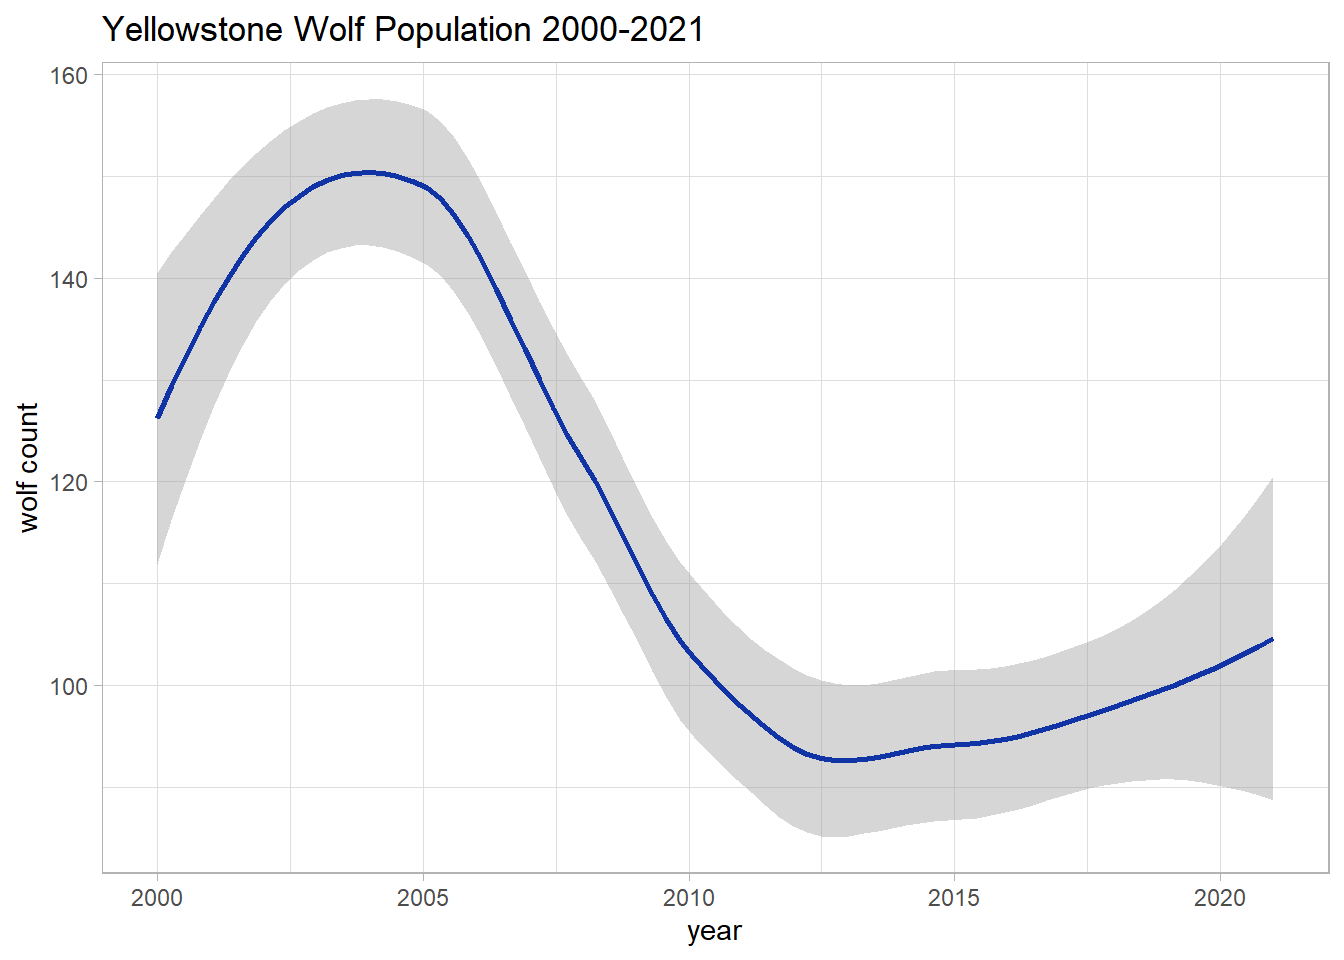

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

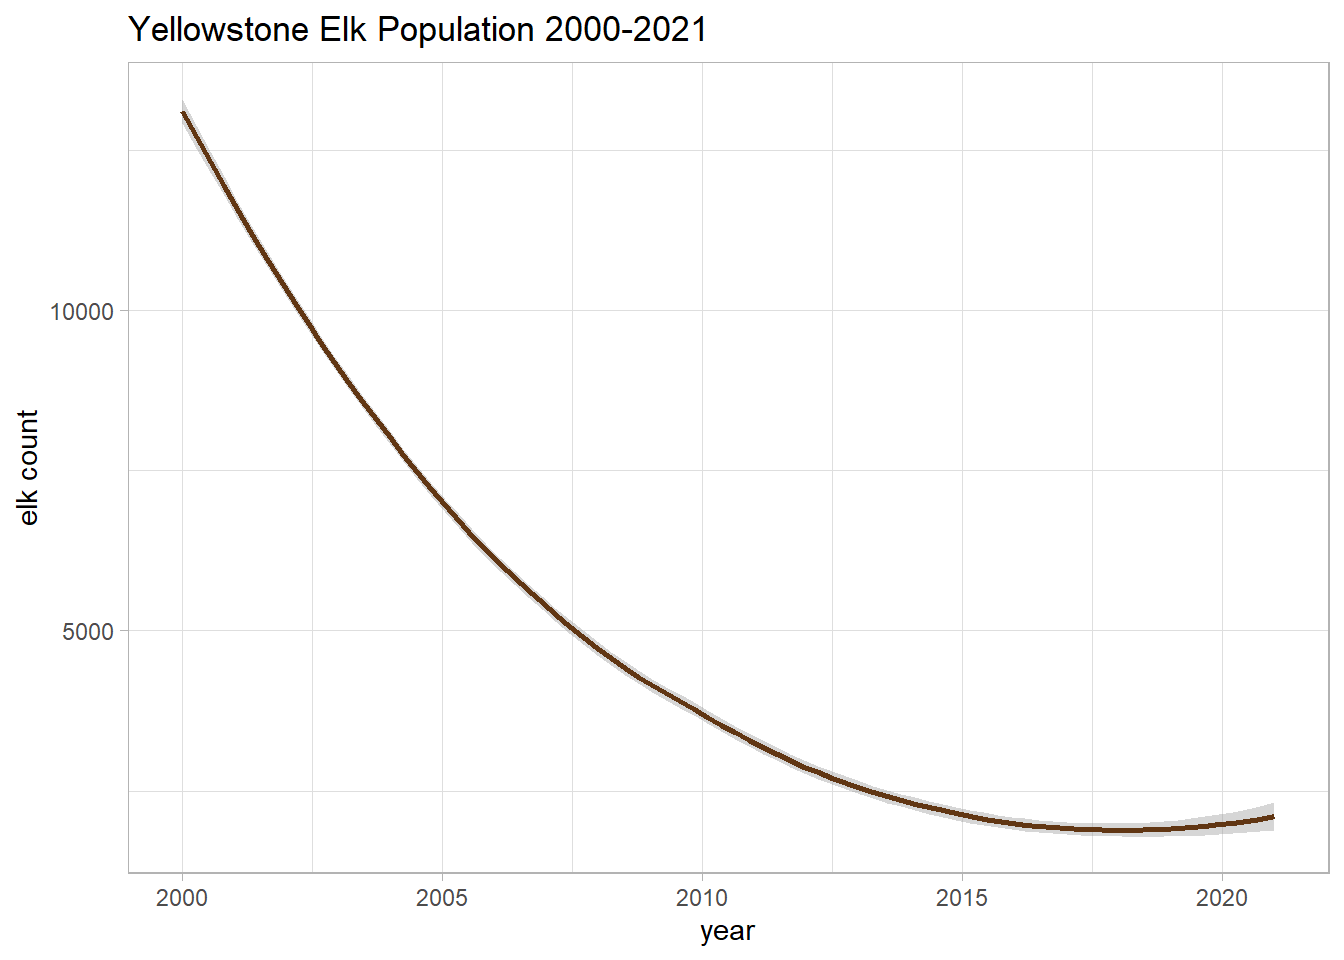

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

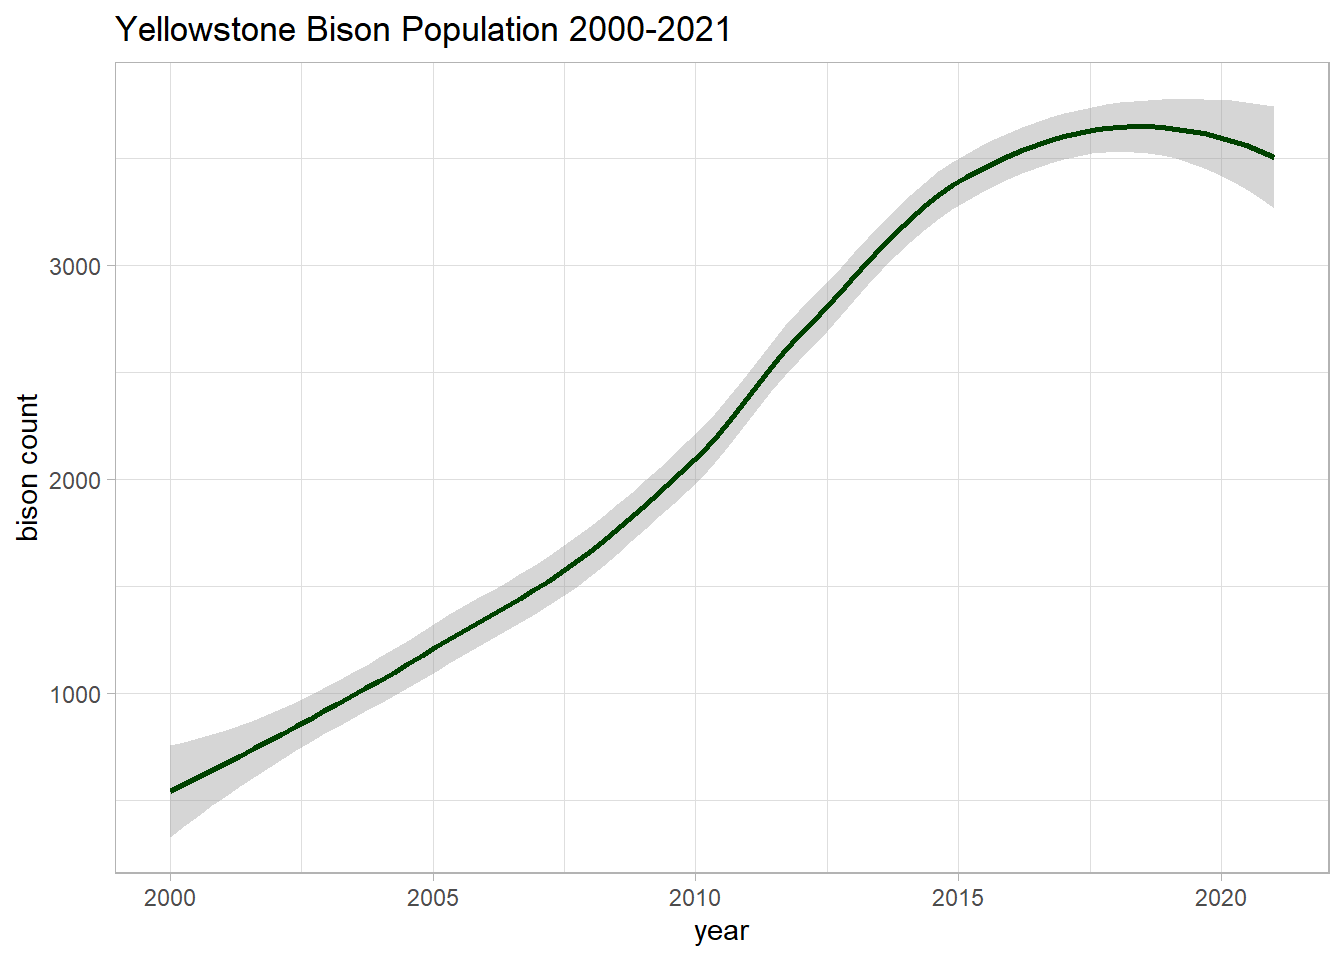

In [ ]:
library(ggplot2)

wolf_pop_plot = ggplot(data = data, aes(x = year, y = wolf_count)) +
  geom_smooth(color = "#1034A6") +
  labs(title = "Yellowstone Wolf Population 2000-2021",
       x = "year",
       y = "wolf count") +
# making axes nicely visible
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12),
        axis.text.x = element_text(size = 10, color = "black"),
        axis.text.y = element_text(size = 10, color = "black"),
        axis.line = element_line(color = "black", size = 0.5)) +
  theme_light()

#### Testing the data

First we tested the wolf count data for normality using the Shapiro-Wilk test. This test had a p-value of 5.507e-06, indicating that we should reject the null. The null of this test is that the data is normal, thus this indicates that the wolf population data is not normal.

In [ ]:
shapiro.test(data$wolf_count)


    Shapiro-Wilk normality test

data:  data$wolf_count
W = 0.86479, p-value = 5.507e-06

Next, we tested the elk count data using the same test. Again, the p-value was highly significant(2.789e-07). This indicates that the elk population data is also not normal.

In [ ]:
shapiro.test(data$elk_count)


    Shapiro-Wilk normality test

data:  data$elk_count
W = 0.82078, p-value = 2.789e-07

Lastly, we tested the bison count data using the same test. Once again, the p-value was highly significant(0.0005066). This suggests that the bison population data is also not normal.

In [ ]:
shapiro.test(data$bison_count)


    Shapiro-Wilk normality test

data:  data$bison_count
W = 0.91907, p-value = 0.0005066

The next test we ran was a QQ test. We generated QQ plots for each population count and from looking at the plots found that while the populations do tend to follow the normal distribution line, there are deviations for all three groups, suggesting non-normality.


Attaching package: 'ggpubr'

The following objects are masked from 'package:flextable':

    border, font, rotate

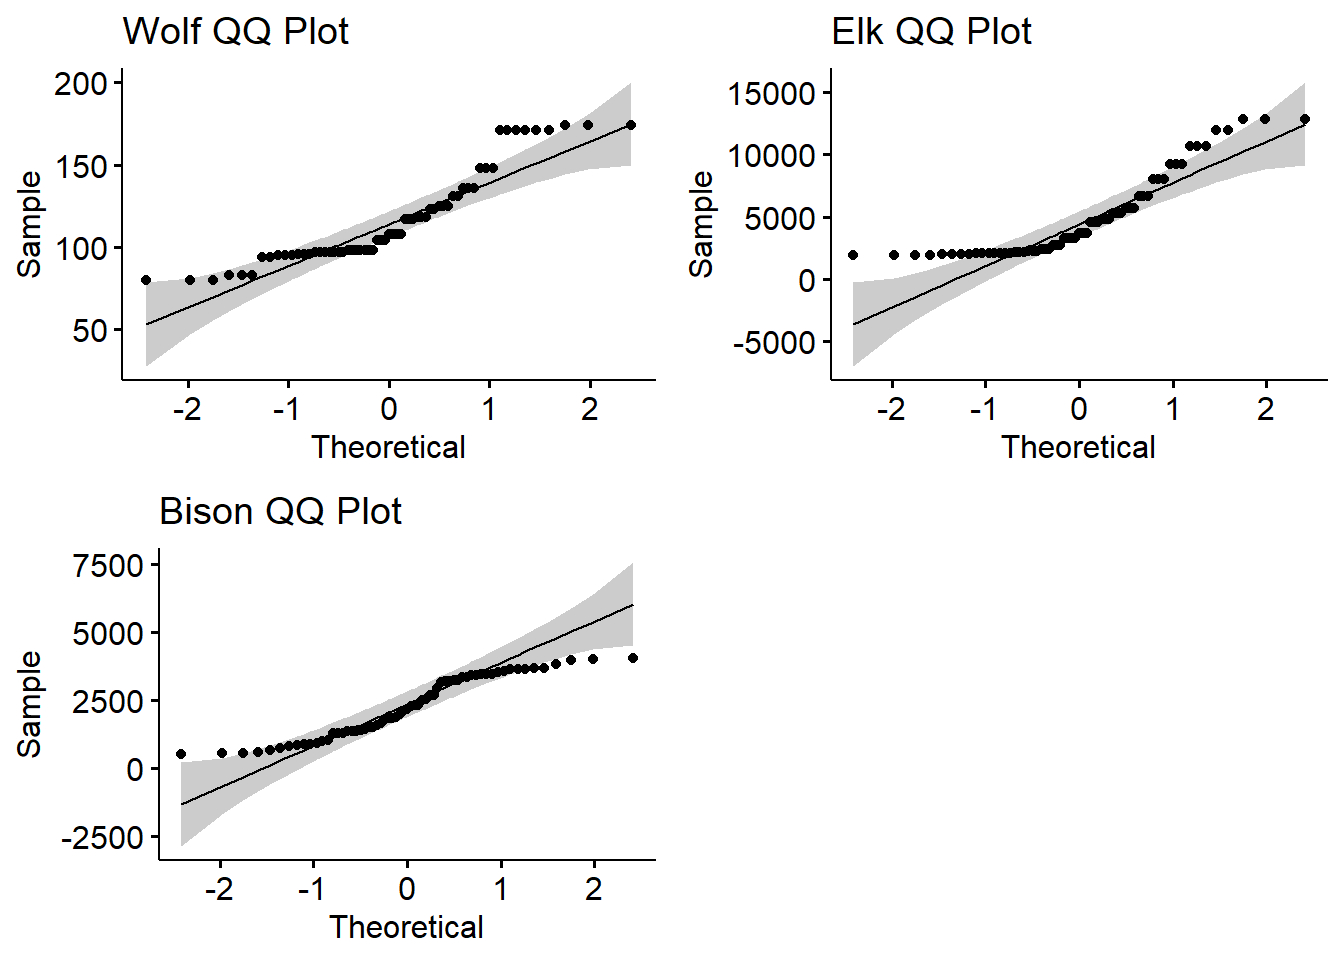

In [ ]:
# wolf qqplot
library(ggpubr)

Cooper, D., & Hobbs, N. (2023). Twenty years of salix height in response to experimental manipulation of browsing and water table, northern range of yellowstone national park. *Dryad, Dataset. Https://Doi. Org/10.5061/Dryad. Sqv9s4n7n*.